In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Load the dataset
df = pd.read_csv('Life Expectancy Data.csv')

In [4]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [8]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [9]:
# Filling Missing Values

y= df["Life expectancy "]
X=  df.drop(["Life expectancy "], axis=1)

In [10]:
y.fillna(y.median(), inplace=True)

In [11]:
X.fillna(X.mean(), inplace=True)

In [12]:
#Binary encoding
import category_encoders as ce
bin_enc = ce.BinaryEncoder(drop_invariant=True)
X = bin_enc.fit_transform(X) 

In [13]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler() 
X = sc.fit_transform(X)

In [33]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.30, random_state=9)

In [34]:
X_train_ = sm.add_constant(X_train)

In [35]:
# Model Training
ols_results = sm.OLS(y_train, X_train_).fit()
print(ols_results.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.822     
Dependent Variable: Life expectancy  AIC:                11558.6783
Date:               2023-03-22 23:08 BIC:                11721.9053
No. Observations:   2056             Log-Likelihood:     -5750.3   
Df Model:           28               F-statistic:        340.6     
Df Residuals:       2027             Prob (F-statistic): 0.00      
R-squared:          0.825            Scale:              15.959    
---------------------------------------------------------------------
          Coef.     Std.Err.      t       P>|t|     [0.025     0.975]
---------------------------------------------------------------------
const     69.2072     0.0882   784.5206   0.0000    69.0342   69.3802
x1         0.2539     0.1013     2.5062   0.0123     0.0552    0.4527
x2         0.1395     0.1053     1.3251   0.1853    -0.0670    0.3460
x3         0.3774     0.0916     4.1216   0.0000     0

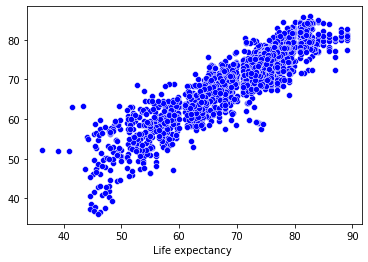

In [36]:
sns.scatterplot(x=y, y=ols_results.fittedvalues, color="b");

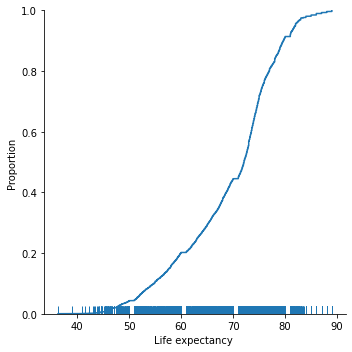

In [37]:
sns.displot(x=y, kind="ecdf",  rug=True);

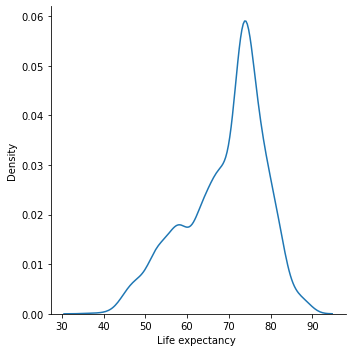

In [38]:
sns.displot(x=y, kind="kde");

In [39]:
# Predict on the training and testing data
compare_pred_df = pd.DataFrame({'actual_y': y, 'y_hat':ols_results.fittedvalues})
compare_pred_df.head(10)

,actual_y,y_hat
0,65.0,60.444902
1,59.9,61.326743
2,59.9,61.395774
3,59.5,61.359004
4,59.2,60.928034
5,58.8,NaN
6,58.6,NaN
7,58.1,NaN
8,57.5,59.128193
9,57.3,NaN


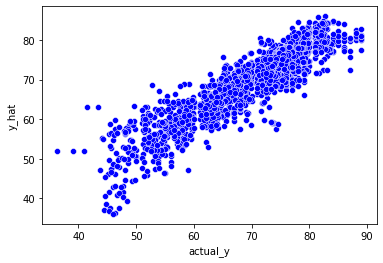

In [40]:
sns.scatterplot(x="actual_y", y="y_hat", color="b", data=compare_pred_df);

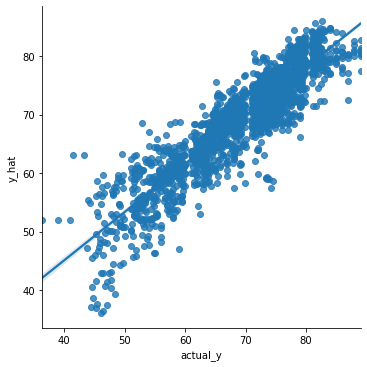

In [41]:
g = sns.lmplot(x="actual_y", y="y_hat", data=compare_pred_df)

In [42]:
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the training and testing data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate RMSE and MSE for the training and testing data
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Print the RMSE and MSE for the training and testing data
print("RMSE for training data: ", rmse_train)
print("RMSE for testing data: ", rmse_test)
print("MSE for training data: ", mse_train)
print("MSE for testing data: ", mse_test)

RMSE for training data:  3.9666385659293306
RMSE for testing data:  4.131054496185596
MSE for training data:  15.734221512717896
MSE for testing data:  17.065611250455234
